# EMBARCATECH

RESIDÊNCIA TECNOLÓGICA EM SOFTWARE EMBARCADO

ALUNOS: Davi Sanchez, Emyle Silva e Juan Pablo

POLO: Ilhéus/Itabuna

DATA: 18/01/2025

DATASET: MNIST

In [1]:
# ============================================================
# 1. Instalação e Importação de Bibliotecas
# ============================================================
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(f"Versão do TensorFlow: {tf.__version__}")


Versão do TensorFlow: 2.19.0


In [2]:
# ============================================================
# 2. Carregar e Preparar o Dataset MNIST
# ============================================================
# Importar dataset de digitos
from tensorflow.keras.datasets import mnist

# Carregar dados (já vem separado em treino e teste)
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalização (0 a 255 -> 0.0 a 1.0)
# Isso é mais eficiente para o microcontrolador do que StandardScaler
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape para formato de CNN: (Batch, Altura, Largura, Canais)
# O canal é 1 pois a imagem é escala de cinza
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print(f"Dataset MNIST carregado. Shape Treino: {X_train.shape}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Dataset MNIST carregado. Shape Treino: (60000, 28, 28, 1)


In [3]:
# ============================================================
# 3. Definir e Treinar a CNN
# ============================================================
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),

    # --- Início da CNN ---
    # Camada de Convolução: Extrai características
    # Filtros reduzidos (8 ou 16) para economizar RAM no RP2040
    layers.Conv2D(8, (3, 3), activation='relu'),

    # Pooling: Reduz a dimensão da imagem pela metade (fica 14x14)
    layers.MaxPooling2D((2, 2)),

    # Pode adicionar mais uma camada se precisar de mais acurácia,
    # mas cuidado com o tamanho final!
    # layers.Conv2D(16, (3, 3), activation='relu'),
    # layers.MaxPooling2D((2, 2)),

    # Achatamento para entrar na parte densa
    layers.Flatten(),
    # ---------------------

    layers.Dense(16, activation='relu'),

    # Saída: 10 neurônios (dígitos 0-9)
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Treinar
print("\nIniciando treino da CNN...")
# MNIST é fácil, 5 a 10 épocas geralmente bastam para >95%
history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.2)
print("Treino concluído.")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │        21,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,898 (85.54 KB)

 Trainable params: 21,898 (85.54 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando treino da CNN...
Epoch 1/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7966 - loss: 0.6780 - val_accuracy: 0.9444 - val_loss: 0.1883
Epoch 2/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9516 - loss: 0.1670 - val_accuracy: 0.9651 - val_loss: 0.1229
Epoch 3/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9669 - loss: 0.1113 - val_accuracy: 0.9709 - val_loss: 0.0990
Epoch 4/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9756 - loss: 0.0815 - val_accuracy: 0.9769 - val_loss: 0.0820
Epoch 5/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9788 - loss: 0.0698 - val_accuracy: 0.9772 - val_loss: 0.0783
Epoch 6/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9820 - loss: 0.0574 - val_accuracy: 0.9756 - val_loss: 0.0799
Epoch 7/7
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9845 - loss: 0.0504 - val_accuracy: 0.9811 - val_loss: 0.0667
Treino concluído.



Acurácia no Teste: 97.96%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



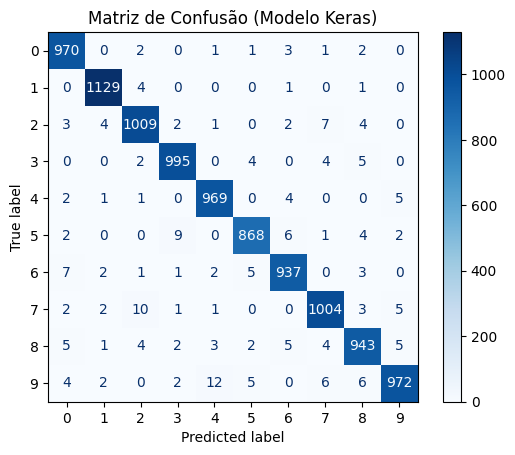

In [4]:
# ============================================================
# 4. Avaliação do Modelo (Keras)
# ============================================================
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nAcurácia no Teste: {acc*100:.2f}%")

# Previsões para gerar matriz de confusão
y_pred = np.argmax(model.predict(X_test), axis=1)

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão (Modelo Keras)")
plt.show()



In [8]:
# ============================================================
# 5. Exportar para TensorFlow Lite (TinyML)
# ============================================================
# Converter o modelo
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

# Guardar o arquivo .tflite
tflite_filename = "mnist_model.tflite"
with open(tflite_filename, "wb") as f:
    f.write(tflite_model)

print(f"\nModelo TFLite gerado: {tflite_filename}")
print(f"Tamanho do arquivo: {len(tflite_model)} bytes")



Saved artifact at '/tmp/tmp196w_ghq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139244437247696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139244437248848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139244437248080: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139244437249232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139244437249040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139244437249616: TensorSpec(shape=(), dtype=tf.resource, name=None)

Modelo TFLite gerado: mnist_model.tflite
Tamanho do arquivo: 90328 bytes


In [9]:
# ============================================================
# 6. Gerar Arquivo de Cabeçalho C (.h) para o RP2040
# ============================================================
# O comando xxd converte o binário em um array hexadecimal C
header_filename = "mnist_model_data.h"

# Executa comando do sistema (funciona em Linux/Mac/Colab)
# Se estiver no Windows sem xxd, o output não será gerado automaticamente.
os.system(f"xxd -i {tflite_filename} > {header_filename}")

print(f"\nTentativa de gerar {header_filename}...")
if os.path.exists(header_filename):
    print(f"Sucesso! O arquivo {header_filename} foi criado.")
    print("Conteúdo das primeiras linhas:")
    with open(header_filename, 'r') as f:
        print(f.read(200) + "...")
else:
    print("Erro: xxd não encontrado ou falha na geração. Se estiver no Windows, use uma ferramenta alternativa.")




Tentativa de gerar mnist_model_data.h...
Sucesso! O arquivo mnist_model_data.h foi criado.
Conteúdo das primeiras linhas:
unsigned char mnist_model_tflite[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00,...


In [7]:
# ============================================================
# 7. Teste de Inferência com o Modelo TFLite (Simulação)
# ============================================================
# Verifica se o modelo .tflite funciona como esperado antes de embarcar
interpreter = tf.lite.Interpreter(model_path=tflite_filename)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Testar com uma amostra do conjunto de teste
sample_idx = 0
input_data = np.expand_dims(X_test[sample_idx], axis=0).astype(np.float32)

interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

print(f"\n--- Teste de Inferência TFLite (Amostra {sample_idx}) ---")
print(f"Classe Real: {y_test[sample_idx]}")
print(f"Probabilidades TFLite: {output_data}")
print(f"Classe Predita: {np.argmax(output_data)}")


--- Teste de Inferência TFLite (Amostra 0) ---
Classe Real: 7
Probabilidades TFLite: [[1.6521311e-07 5.4291661e-08 6.7451692e-06 5.3977696e-05 2.4920691e-10
  2.9168630e-08 2.9765535e-13 9.9973875e-01 7.6888284e-07 1.9953426e-04]]
Classe Predita: 7


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)
